In [655]:
# Import necessary packages.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [656]:
# Load everything into dataframes
cols = ['user', 'movie', 'raw_ratings']
data   = pd.read_csv('./data/data.txt', sep='\t', names=cols, encoding='latin-1')
train  = pd.read_csv('./data/train.txt', sep='\t', names=cols, encoding='latin-1')
test   = pd.read_csv('./data/test.txt', sep='\t', names=cols, encoding='latin-1')

In [657]:
# Use off-the-shelf Surprise SVD
from surprise import SVD, accuracy
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import Reader, Dataset

In [658]:
# Use default dataset from scikit
default_data = Dataset.load_builtin('ml-100k')

# Split into training and testing sets
train_data, test_data = train_test_split(default_data, test_size=0.1)

In [797]:
# Optimize SVD using GridSearchCV
from surprise.model_selection import GridSearchCV

params = {'n_epochs': [10, 15, 20], 'lr_all': [0.005, 0.01, 0.015],
              'reg_all': [0.05, 0.1, 0.15], 'n_factors': [100]}

gs = GridSearchCV(SVD, params, measures=['rmse', 'mae'], cv=3)

gs.fit(default_data)

# Get best rmse
print(gs.best_score['rmse'])

# Get best parameters
print(gs.best_params['rmse'])

0.9396368495884743
{'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.05, 'n_factors': 100}


In [799]:
# Train SVD using optimal parameters
svd = SVD(**gs.best_params['rmse'])
svd.fit(train_data)

# Generate predictions on test set
predictions = svd.test(test_data)

# Compute RMSE
accuracy.rmse(predictions)

# Compute MSE
accuracy.mse(predictions)

# Compute Loss
print("Loss: ", 1/2*accuracy.mse(predictions))

RMSE: 0.9163
MSE: 0.8396
MSE: 0.8396
Loss:  0.41978885684134054


In [800]:
# Create visualization
U = svd.pu
V = svd.qi

In [801]:
U_mc = np.transpose(U) - np.transpose(np.array([np.mean(np.transpose(U), axis=1)]))
V_mc = np.transpose(V) - np.transpose(np.array([np.mean(np.transpose(V), axis=1)]))

In [815]:
# Compute SVD of U and V
A_U, S, B = np.linalg.svd(U_mc)
A_V, S, B = np.linalg.svd(V_mc)

# Calculate U tilde and V tilde.
U_tilde = np.dot(np.transpose(A_U[:, 0:2]), U_mc)
V_tilde = np.dot(np.transpose(A_V[:, 0:2]), V_mc)

In [803]:
movies = pd.read_csv('./data/movies.txt', sep="\t", names=["id", "title", \
                    "unknown", "action", "adventure", "animation", "childrens", \
                    "comedy", "crime", "documentary", "drama", "fantasy", 
                    "film-noir", "horror", "musical", "mystery", "romance", \
                    "sci-fi", "thriller", "war", "western"])

In [804]:
# Load all user, movie, ratings data
data   = np.loadtxt('./data/data.txt').astype(int)
n_movies = len(V_tilde[0])

# Helpers for Visualizations

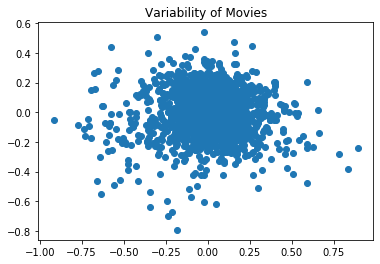

In [805]:
# All Movies
plt.title("Variability of Movies")
plt.plot(V_tilde[0], V_tilde[1], "o")
plt.show()

# Determine axis limits to be -0.4 to 0.4 for x and y axes

In [806]:
'''
    Passed a list of movie indices, idx, return the idx sorted by greatest
    number of ratings (descending order).
'''
def OrderByNumRatings (idx):
    data   = np.loadtxt('./data/data.txt').astype(int)
    mov_pop = np.zeros(len(idx))

    for i in range(len(idx)):
        pop = len(np.where(data[:, 1] == idx[i])[0])
        mov_pop[i] = pop

    order = np.argsort(mov_pop) # Get order of indices of idx
    sorted_idx = np.flipud([idx[i] for i in order])
    return sorted_idx

# Required Visualizations

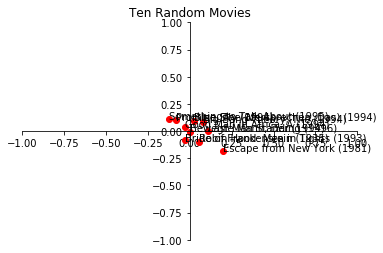

In [807]:
# Visualize Ten Random Movies
data   = np.loadtxt('./data/data.txt').astype(int)

#print(mov_ratings)
rand_movie_idx = [840, 671, 1211, 1563, 636, 1504, 1523, 1235, 395, 775]
rand_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in rand_movie_idx]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Get corresponding latent factors and plot
V_tilde_rand = V_tilde[:, rand_movie_idx]
for i in range(len(worst_movie_idx)):
    plt.plot(V_tilde_rand[0][i], V_tilde_rand[1][i], "ro")
    plt.text(V_tilde_rand[0][i], V_tilde_rand[1][i], rand_movies[i])
   
plt.xlim(-1, 1)
plt.ylim(-1, 1) 
plt.title("Ten Random Movies")
plt.show()

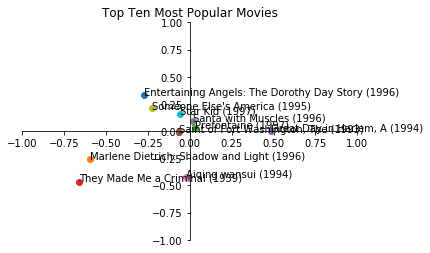

Top Ten Most Popular Movies:
['Independence Day (ID4) (1996)', 'Air Force One (1997)', 'Toy Story (1995)', 'Scream (1996)', 'English Patient, The (1996)', 'Liar Liar (1997)', 'Return of the Jedi (1983)', 'Fargo (1996)', 'Contact (1997)', 'Star Wars (1977)']


In [808]:
# Visualize Ten Most Popular Movies

# Get top ten most popular movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop

top_movie_idx = np.argsort(mov_pop)[-10:]+1
top_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in top_movie_idx]
 
# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, top_movie_idx]

l1 = [V_tilde_best[0][i] for i in range(10)]
l2 = [V_tilde_best[1][i] for i in range(10)]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for i in range(10):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "o")
    plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Top Ten Most Popular Movies")
plt.show()

print("Top Ten Most Popular Movies:")
print(top_movies)

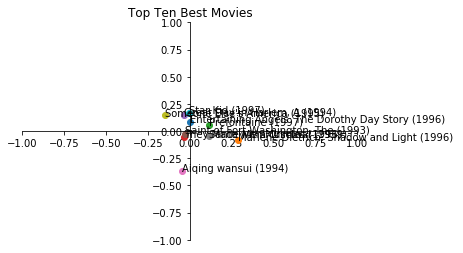

Top Ten Best Movies:
['Entertaining Angels: The Dorothy Day Story (1996)', 'Marlene Dietrich: Shadow and Light (1996) ', 'Prefontaine (1997)', 'They Made Me a Criminal (1939)', 'Great Day in Harlem, A (1994)', 'Saint of Fort Washington, The (1993)', 'Aiqing wansui (1994)', 'Santa with Muscles (1996)', "Someone Else's America (1995)", 'Star Kid (1997)']


In [810]:
# Visualize Ten Best Movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_ratings = np.zeros(n_movies)

for i in range(1667):
    #print(i)
    movie_index = i + 1
    avg_rating = np.mean(data[np.where(data[:, 1] == movie_index)][:,2])
    mov_ratings[i] = avg_rating

#print(mov_ratings)
best_movie_idx = np.argsort(mov_ratings)[-10:]+1
best_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in best_movie_idx]

# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, best_movie_idx]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

for i in range(10):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "o")
    plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.title("Top Ten Best Movies")
plt.show()

print("Top Ten Best Movies:")
print(best_movies)

# Visualize Three Genres

['Serial Mom (1994)' "Amityville 1992: It's About Time (1992)"
 "Devil's Advocate, The (1997)" 'Nightmare on Elm Street, A (1984)'
 'Frighteners, The (1996)'
 'Tales From the Crypt Presents: Demon Knight (1995)'
 'American Werewolf in London, An (1981)' 'Heavy Metal (1981)'
 "Robert A. Heinlein's The Puppet Masters (1994)"
 'From Dusk Till Dawn (1996)']


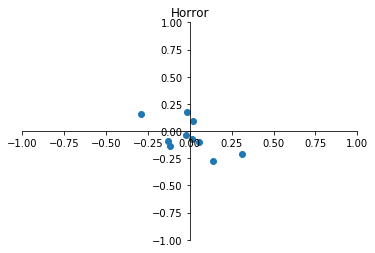

In [819]:
# Visualize Horror
import random

data   = np.loadtxt('./data/data.txt').astype(int)

horror = movies[movies['horror'] == 1]
hor_id = np.array(horror['id'])
hor_pop = mov_pop[ani_id-1]

top_hor = np.argsort(hor_pop)[-10:]
top_hor_id = hor_id[top_hor]
hor_titles = np.array(horror.iloc[top_hor]['title'])

print(hor_titles)
V_tilde_genre = V_tilde[:, top_hor_id-1]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

l1 = []
l2 = []
for i in range(len(top_ani_id)):
    l1.append(V_tilde_genre[0][i])
    l2.append(V_tilde_genre[1][i])
plt.title("Horror")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(l1, l2)
plt.show()

[]


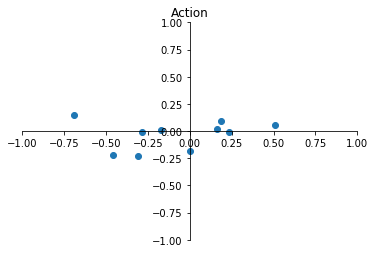

In [820]:
# Visualize Action
import random

data   = np.loadtxt('./data/data.txt').astype(int)

action = movies[movies['action'] == 1]
act_id = np.array(action['id'])
act_pop = mov_pop[act_id-1]

top_act = np.argsort(act_pop)[-10:]
top_act_id = list([312, 221, 171, 116, 126, 173, 120, 299, 180, 49]) #act_id[top_act]
act_titles = np.array(action.iloc[top_act]['title'])

print(act_titles)
V_tilde_genre = V_tilde[:, top_act_id]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

l1 = []
l2 = []
for i in range(len(top_ani_id)):
    l1.append(V_tilde_genre[0][i])
    l2.append(V_tilde_genre[1][i])
plt.title("Action")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(l1, l2)
plt.show()

['James and the Giant Peach (1996)' 'Hunchback of Notre Dame, The (1996)'
 'Cinderella (1950)' 'Beavis and Butt-head Do America (1996)'
 'Snow White and the Seven Dwarfs (1937)' 'Fantasia (1940)'
 'Beauty and the Beast (1991)' 'Aladdin (1992)' 'Lion King, The (1994)'
 'Toy Story (1995)']


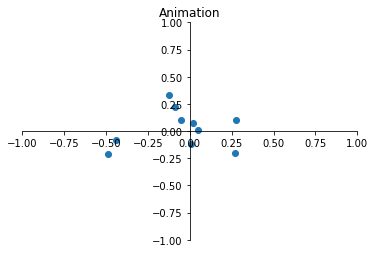

In [821]:
# Visualize Animation
import random

data   = np.loadtxt('./data/data.txt').astype(int)

animation = movies[movies['animation'] == 1]
ani_id = np.array(animation['id'])
ani_pop = mov_pop[ani_id-1]

top_ani = np.argsort(ani_pop)[-10:]
top_ani_id = ani_id[top_ani]
ani_titles = np.array(animation.iloc[top_ani]['title'])

print(ani_titles)
V_tilde_genre = V_tilde[:, top_ani_id-1]

# Initialize plot with spines
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

l1 = []
l2 = []
for i in range(len(top_ani_id)):
    l1.append(V_tilde_genre[0][i])
    l2.append(V_tilde_genre[1][i])
plt.title("Animation")
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.scatter(l1, l2)
plt.show()

# Visualizations for Fun

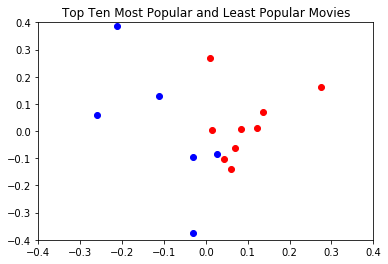

Top Ten Most Popular Movies:
['Independence Day (ID4) (1996)', 'Air Force One (1997)', 'Toy Story (1995)', 'Scream (1996)', 'English Patient, The (1996)', 'Liar Liar (1997)', 'Return of the Jedi (1983)', 'Fargo (1996)', 'Contact (1997)', 'Star Wars (1977)']
Top Ten Least Popular Movies:
['Touki Bouki (Journey of the Hyena) (1973)', 'Quartier Mozart (1992)', 'Here Comes Cookie (1935)', 'Vie est belle, La (Life is Rosey) (1987)', 'Vermont Is For Lovers (1992)', 'Careful (1992)', 'Man from Down Under, The (1943)', 'Daens (1992)', 'To Cross the Rubicon (1991)']


In [742]:
# Visualize Ten Most Popular and Ten Least Popular Movies

# Get top ten most popular movies
data   = np.loadtxt('./data/data.txt').astype(int)
mov_pop = np.zeros(n_movies)

for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop

top_movie_idx = np.argsort(mov_pop)[-10:]+1
top_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in top_movie_idx]

bot_movie_idx = np.argsort(mov_pop)[1:10]+1
bot_movies = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in bot_movie_idx]
 
# Get corresponding latent factors and plot
V_tilde_best = V_tilde[:, top_movie_idx]
V_tilde_worst = V_tilde[:, bot_movie_idx]

l1 = [V_tilde_best[0][i] for i in range(len(top_movie_idx))]
l2 = [V_tilde_best[1][i] for i in range(len(top_movie_idx))]

for i in range(len(l1)):
    plt.plot(V_tilde_best[0][i], V_tilde_best[1][i], "bo")
    #plt.text(V_tilde_best[0][i], V_tilde_best[1][i], best_movies[i])
    
l1 = [V_tilde_worst[0][i] for i in range(len(bot_movie_idx))]
l2 = [V_tilde_worst[1][i] for i in range(len(bot_movie_idx))]

for i in range(len(l1)):
    plt.plot(V_tilde_worst[0][i], V_tilde_worst[1][i], "ro")
    #plt.text(V_tilde_worst[0][i], V_tilde_worst[1][i], best_movies[i])

plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4) 
plt.title("Top Ten Most Popular and Least Popular Movies")
plt.show()

print("Top Ten Most Popular Movies:")
print(top_movies)
print("Top Ten Least Popular Movies:")
print(bot_movies)

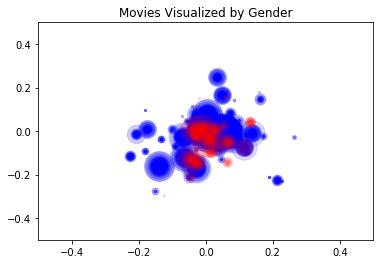

In [723]:
# Visualize series of movies by gender
data   = np.loadtxt('./data/data.txt').astype(int)
words = ['boy', 'man', 'girl', 'woman']
colors = ['b', 'b', 'r', 'r', ]
plots = []

# Get number ratings per movie
mov_pop = np.zeros(n_movies)
for i in range(n_movies):
    movie_index = i + 1
    pop = len(np.where(data[:, 1] == movie_index)[0])
    mov_pop[i] = pop
# Get average rating per movie
mov_ratings = np.zeros(n_movies)
for i in range(1667):
    movie_index = i + 1
    avg_rating = np.mean(data[np.where(data[:, 1] == movie_index)][:,2])
    mov_ratings[i] = avg_rating

fig = plt.figure()

# Get random movies for each genre
for x in range(len(words)):
    lst_idx = np.where(movies['title'].str.lower().str.contains(words[x]))
    movie_idx = movies['id'][lst_idx[0]]
    movie_titles = [movies.iloc[np.where(movies['id'] == idx)[0][0], :]['title'] for idx in movie_idx]

    # Get corresponding latent factors and plot
    V_tilde_genre = V_tilde[:, movie_idx]
    sizes = [mov_pop[i]*5.0 for i in movie_idx] # Corresponding to popularity
    alphas = [mov_ratings[i]/20.0 for i in movie_idx] # Corresponding to average rating

    l1 = []
    l2 = []
    for i in range(len(movie_titles)):
        l1.append(V_tilde_genre[0][i])
        l2.append(V_tilde_genre[1][i])
        plt.scatter(l1, l2, color=colors[x], marker='o', s=sizes[i], alpha=alphas[i])
 
plt.xlim(-0.5, 0.5)
plt.ylim(-0.5, 0.5)
plt.title("Movies Visualized by Gender")
#plt.legend(words)
plt.show()